# Does earning a Master's degree increase your income?

REF: https://www.kaggle.com/marcomurtinu/is-a-phd-worth-it/notebook

For the purpose of this project, we have used a dataset from Kaggle. The dataset was originally obtained from Levels.fyi and has the title of the workers, company, location, yearly salary, years of experience, level of education, race and education level. This dataset allows us to analyze whether a Master's degree is really worth the buck, particularly in STEM related jobs. 

## Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import random
import statsmodels.formula.api as sm
plt.style.use('default')
pd.set_option('display.max_columns', None)
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [2]:
df.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.shape

(62642, 29)

The original dataset has 62642 rows and 29 columns

## Data Cleaning

Looking at the percent of null values in different columns

In [4]:
df.isnull().sum()/len(df)*100

timestamp                   0.000000
company                     0.007982
level                       0.189968
title                       0.000000
totalyearlycompensation     0.000000
location                    0.000000
yearsofexperience           0.000000
yearsatcompany              0.000000
tag                         1.363303
basesalary                  0.000000
stockgrantvalue             0.000000
bonus                       0.000000
gender                     31.193129
otherdetails               35.926375
cityid                      0.000000
dmaid                       0.003193
rowNumber                   0.000000
Masters_Degree              0.000000
Bachelors_Degree            0.000000
Doctorate_Degree            0.000000
Highschool                  0.000000
Some_College                0.000000
Race_Asian                  0.000000
Race_White                  0.000000
Race_Two_Or_More            0.000000
Race_Black                  0.000000
Race_Hispanic               0.000000
R

#### Removing rows where Education is null.

In [5]:
df = df[df['Education'].notna()]

In [6]:
df.shape

(30370, 29)

After removing null values in the Educations, there are 30370 rows remaining that we can work with. Since our primary question deals with the Education level, it was important to not have null values in the column to make conclusions from our analysis.

#### Filling null values in level, company, tag with mode

In [7]:
df['level']=df['level'].fillna(df['level'].mode()[0]) # fill mode with most observations, i.e L4

In [8]:
df['tag']=df['tag'].fillna(df['tag'].mode()[0]) #fill tag with mode, i.e. 'Full Stack'

In [9]:
df['company']=df['company'].fillna(df['company'].mode()[0]) #fill tag with mode, i.e. 'Amazon'

In [10]:
#df["gender"].fillna(lambda x: random.choice(df[df["gender"] != np.nan]["gender"]), inplace =True) # filling random values for gender

In [11]:
df["gender"].fillna(random.choice(['Male','Female']), \
                    inplace =True) # filling random values for gender

In [12]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
46,9/1/2017 12:09:30,Salesforce,Lead MTS,Software Engineer,320000,"San Francisco, CA",4.0,1.0,Full Stack,210000.0,80000.0,30000.0,Male,PhD,7419,807.0,75,0,0,1,0,0,0,0,0,0,0,NaN,PhD
717,8/9/2018 12:01:10,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,Male,I have a PhD and I'm joining for a Research Sc...,7300,807.0,1325,0,0,1,0,0,0,0,0,0,0,NaN,PhD
3427,12/28/2018 6:53:55,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,Male,PhD,40303,511.0,4743,0,0,1,0,0,0,0,0,0,0,NaN,PhD
5037,3/18/2019 10:03:34,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,Male,Entry-level Masters Degree,10182,501.0,6813,1,0,0,0,0,0,0,0,0,0,NaN,Master's Degree
5392,3/31/2019 16:58:35,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,Male,PhD,7351,807.0,7271,0,0,1,0,0,0,0,0,0,0,NaN,PhD


#### Focusing on employees with 25 years of experience

From the graph below, we can see that most employees in the dataset have between 0 - 10 years of experience.

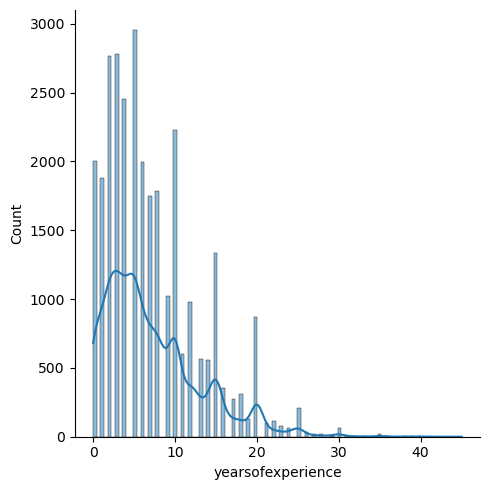

In [13]:
sns.displot(data = df, x = "yearsofexperience", kde = True)
plt.show()

Removing outlier employees with more than 25 years of experience. 

In [14]:
df = df[df['yearsofexperience'] < 25]
df.shape

(29964, 29)

## Exploratory Data Analysis

#### Count of employees by education level

In [15]:
ed_count = df["Education"].value_counts()

ed_count_percent = df["Education"].value_counts(normalize =True)
ed_count_percent

Master's Degree      0.506741
Bachelor's Degree    0.415599
PhD                  0.056034
Some College         0.011147
Highschool           0.010479
Name: Education, dtype: float64

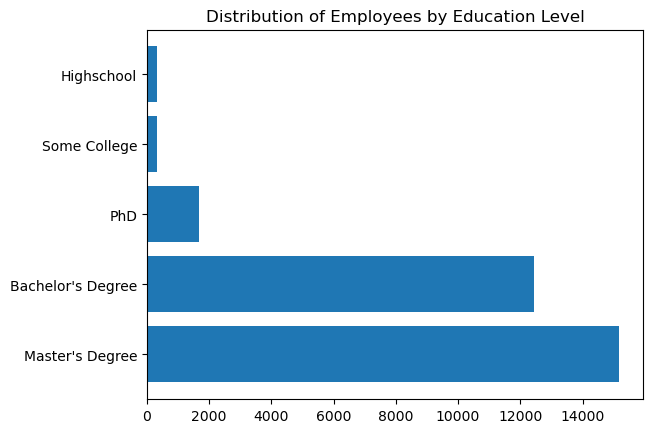

In [16]:
plt.style.use('default')

plt.barh(ed_count.index, ed_count)

plt.title('Distribution of Employees by Education Level')

plt.show()

From the above graph, we can see that more than 15000 (50%) employees in this dataset hold a Master's degree.

#### Average Total Yearly Compensation by Education

In [17]:
comp_by_education = df.groupby(['Education'])['totalyearlycompensation'].mean()
comp_by_education

Education
Bachelor's Degree    176302.898900
Highschool           183614.649682
Master's Degree      219203.108535
PhD                  290596.188207
Some College         202877.245509
Name: totalyearlycompensation, dtype: float64

#### Box plots of total yearly compensation by education level

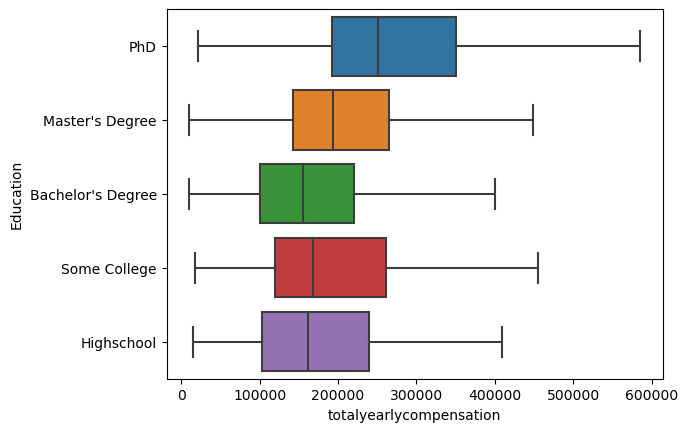

In [18]:
sns.boxplot(x="totalyearlycompensation", y="Education", data=df, orient = "h", showfliers = False)
plt.show()

From the above graph, we can observe that the median total yearly compensation is higher for Master's Degree holders than for Bachelor's Degree holders and High School graduates.

#### Total Yearly Compensation by Top tech companies

In [19]:
#Top 4 companies wrt number of observation- Facebook,Amazon,Apple,Microsoft,Google - 
Top10_companies = df[df['company'].isin(['Amazon',
'Microsoft',
'Google',
'Facebook',
'Apple',])].groupby(['company','Education'])['totalyearlycompensation'].mean().to_frame(name = 'Mean_Compensation').reset_index()
Top10_companies['company'].unique()

array(['Amazon', 'Apple', 'Facebook', 'Google', 'Microsoft'], dtype=object)

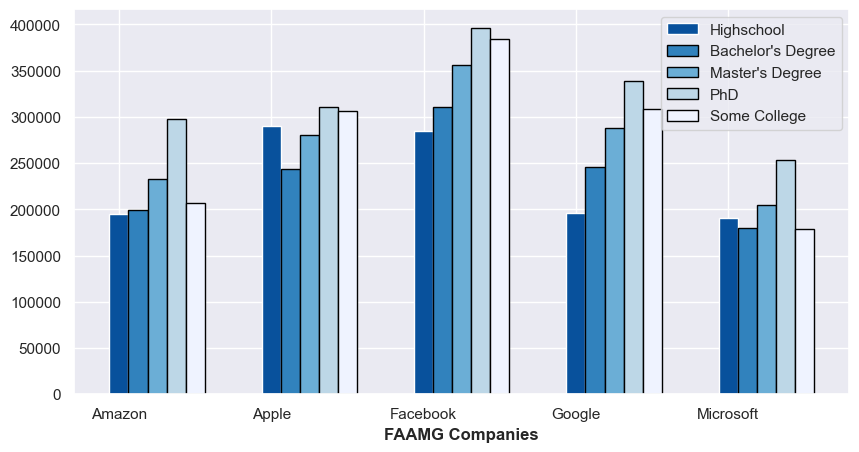

In [56]:
bars_h = Top10_companies[(Top10_companies['Education'] == "Highschool")]['Mean_Compensation']
bars_b = Top10_companies[(Top10_companies['Education'] == "Bachelor's Degree")]['Mean_Compensation']
bars_m = Top10_companies[(Top10_companies['Education'] == "Master's Degree")]['Mean_Compensation']
bars_p = Top10_companies[(Top10_companies['Education'] == "PhD")]['Mean_Compensation']
bars_o = Top10_companies[(Top10_companies['Education'] == "Some College")]['Mean_Compensation']

barWidth = 0.25

r_h = np.arange(0,10,2)
r_b = [x + barWidth for x in r_h]
r_m = [x + barWidth for x in r_b]
r_p = [x + barWidth for x in r_m]
r_o = [x + barWidth for x in r_p]

#r1 = np.arange(len(bars1))
#plt.bar( bars1, color='#7f6d5f', width=0.25, edgecolor='white', label='')
plt.figure(figsize=(10, 5))

bars_h = Top10_companies[(Top10_companies['Education'] == "Highschool")]['Mean_Compensation']
plt.bar(r_h, bars_h,tick_label = bars_h, color='#08519c', width=barWidth, edgecolor='white', label='Highschool' )
plt.bar(r_b, bars_b, color='#3182bd', width=barWidth, edgecolor='black', label="Bachelor's Degree")
plt.bar(r_m, bars_m, color='#6baed6', width=barWidth, edgecolor='black', label="Master's Degree")
plt.bar(r_p, bars_p, color='#bdd7e7', width=barWidth, edgecolor='black', label="PhD")
plt.bar(r_o, bars_o, color='#eff3ff', width=barWidth, edgecolor='black', label="Some College")

plt.xlabel('FAAMG Companies', fontweight='bold')
plt.xticks(np.arange(0,10,2),Top10_companies['company'].unique())
 
# Create legend & Show graphic
plt.legend()
plt.show()

#### Average Total Yearly Compensation by Experience Level

In [21]:
def work_exp(yrs):
    if yrs <= 3:
        workexp = 'Entry Level'
    elif yrs > 3 and yrs <= 10:
        workexp = 'Intermediate'
    else: 
        workexp = 'Experienced'
    return workexp

In [22]:
df['Exp_Level'] = df.apply(lambda x: work_exp(x['yearsofexperience']), axis=1)

In [23]:
comp_by_experience = df.groupby(['Exp_Level'])['totalyearlycompensation'].mean()
comp_by_experience

Exp_Level
Entry Level     147436.321255
Experienced     286619.656097
Intermediate    206443.998026
Name: totalyearlycompensation, dtype: float64

#### Boxplot of Total Yearly Compensation by Experience Level

In [24]:
df_Masters = df[df['Education'] == "Master's Degree"]
df_NotMasters_NoPhD = df[df['Education'].isin(["PhD","Bachelor's Degree","Some College"])]

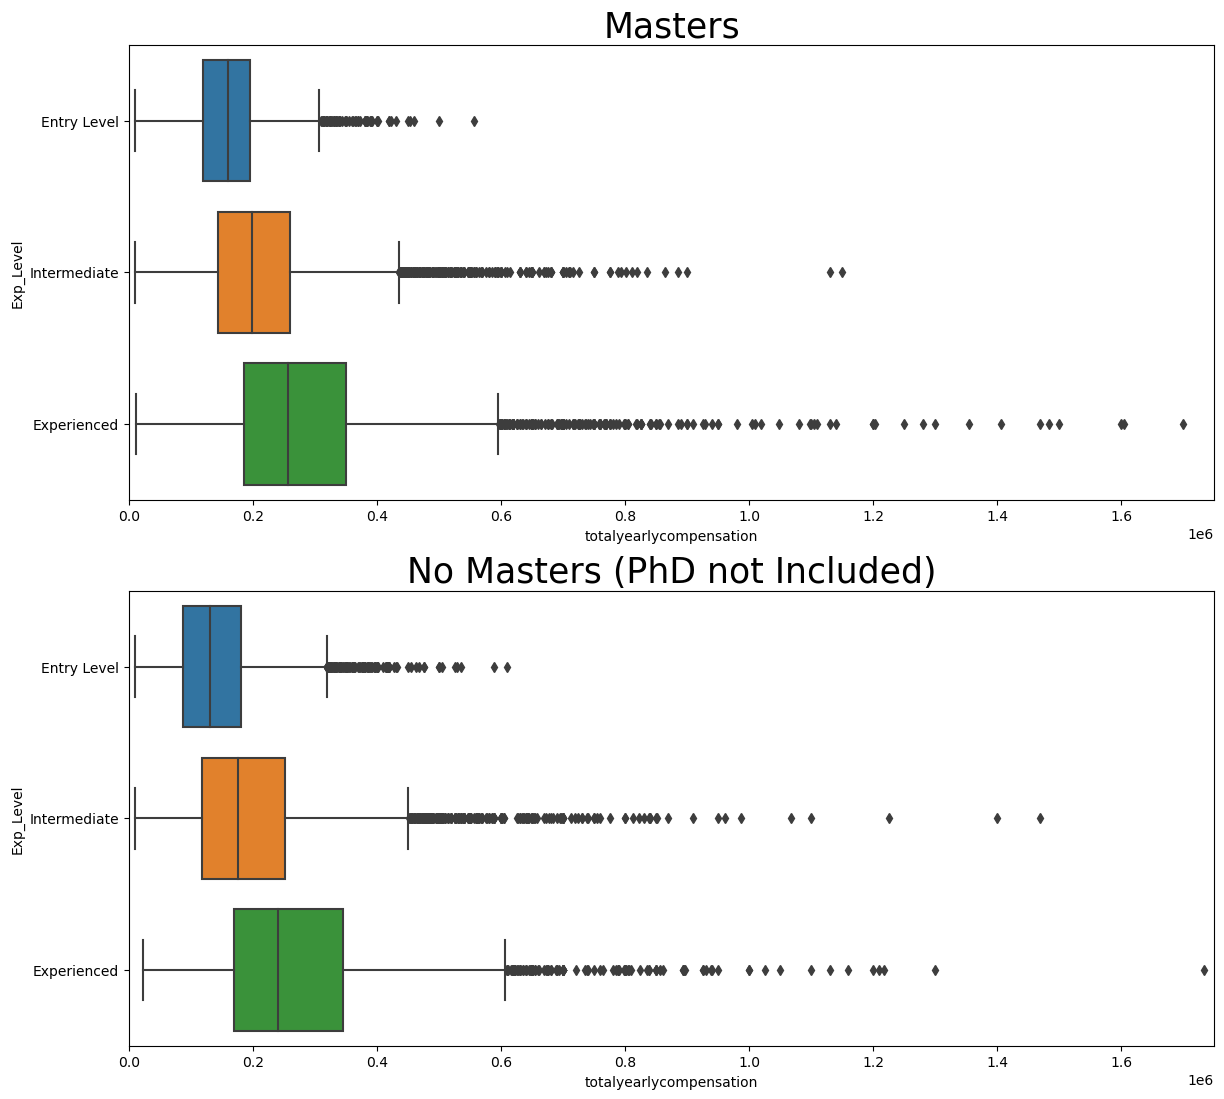

In [25]:
f, axes = plt.subplots(2, figsize = (14,13))
axes[0].set_xlim([0, 1750000])
axes[0].set_title('Masters',fontsize = 25)
axes[1].set_xlim([0, 1750000])
axes[1].set_title('No Masters (PhD not Included)',fontsize = 25)
sns.boxplot(x="totalyearlycompensation", y= "Exp_Level", data=df_Masters, ax = axes[0], order = ['Entry Level', 'Intermediate', 'Experienced'])
sns.boxplot(x="totalyearlycompensation", y= "Exp_Level", data=df_NotMasters_NoPhD, ax = axes[1], order = ['Entry Level', 'Intermediate','Experienced'])
plt.show()

#### Boxplot of Total Yearly Compensation by Education and Experience Level

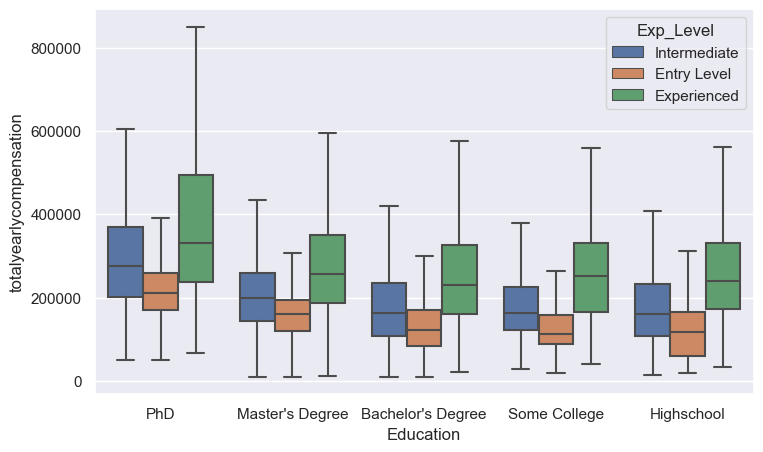

In [26]:
sns.set(rc={'figure.figsize':(8.5,5)})
ax = sns.boxplot(y="totalyearlycompensation", x="Education", hue = "Exp_Level", data=df, showfliers= False)
h, l = ax.get_legend_handles_labels()
plt.show()

## Hypothesis Testing

We are going to use a t-test to understand if the average yearly salary of Master's degree holder is actually larger than the average yearly salary of Non-Master's (excluding PhD). To see if the results can be extended to a population, we perform an hypothesis test:

**Null Hypothesis** : The salary of a person who holds a Masters degree is 
                  equal to the salary of a person who does not have a Masters degree (excluding PhD)<br>
                  
**Alternate Hypothesis** : The salary of a person who holds a Masters degree is 
                       greater than the salary of a person who does not have a Masters degree (excluding PhD)
                       
To apply the t-test we need the distribution of total yearly salary to be approximately Gaussian for both employee with a Master's Degree and employees without a Master's Degree. 

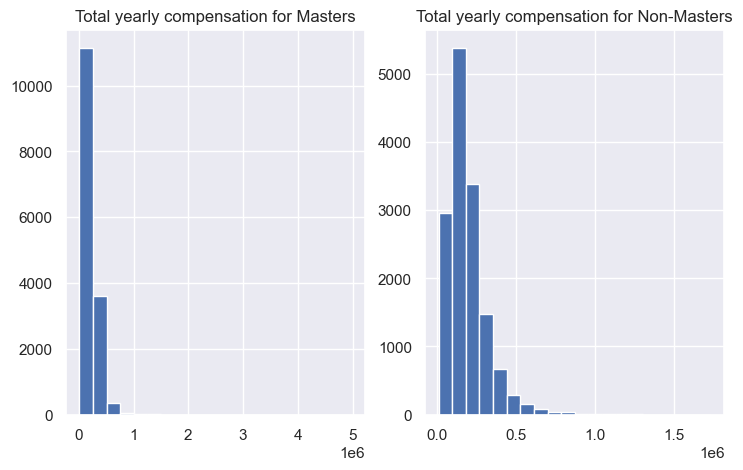

In [27]:
comp_Masters = df_Masters["totalyearlycompensation"]
df_NotMasters_NoPhD = df[df['Education'].isin(["PhD","Bachelor's Degree","Some College"])]
comp_NotMasters = df_NotMasters_NoPhD["totalyearlycompensation"]
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.hist(x = comp_Masters, bins = 20)
ax1.set_title("Total yearly compensation for Masters")
ax2.hist(x = comp_NotMasters, bins = 20)
ax2.set_title("Total yearly compensation for Non-Masters")
plt.show()

Applying a logarithmic distribution to fix the issue.

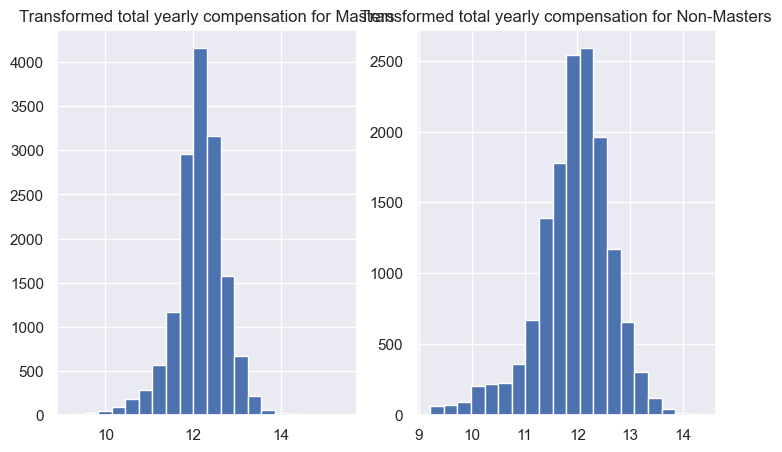

In [28]:
comp_Masters_log = np.log(comp_Masters)
comp_NotMasters_log = np.log(comp_NotMasters)
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.hist(x = comp_Masters_log, bins = 20)
ax1.set_title("Transformed total yearly compensation for Masters")
ax2.hist(x = comp_NotMasters_log, bins = 20)
ax2.set_title("Transformed total yearly compensation for Non-Masters")
plt.show()

In [29]:
a = comp_Masters_log.to_numpy()
b = comp_NotMasters_log.to_numpy()

st.ttest_ind(a, b, equal_var=False, alternative='greater')

Ttest_indResult(statistic=27.71118445496174, pvalue=4.709237545211481e-167)

**The p-value is much smaller than any alpha level we decide to choose. At the 99% level, we can reject the null hypothesis. We can conclude that the salary of a person who holds a Masters degree is greater than the salary of a person who does not have a Masters degree (excluding PhD)**

In [30]:
### use the below line of code if you get an error for the above, and then restart your kernel
#pip install --upgrade scipy

## Linear Regression Analysis

In [31]:
df["ln_yearlycompensation"] = np.log(df["totalyearlycompensation"])

In [32]:
df['ln_basesalary'] = np.log(df["basesalary"]+1)

In [33]:
result = sm.ols(formula="ln_yearlycompensation ~ Masters_Degree + yearsofexperience", 
                data=df).fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_yearlycompensation   R-squared:                       0.162
Model:                               OLS   Adj. R-squared:                  0.162
Method:                    Least Squares   F-statistic:                     2897.
Date:                   Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                           11:53:31   Log-Likelihood:                -26500.
No. Observations:                  29964   AIC:                         5.301e+04
Df Residuals:                      29961   BIC:                         5.303e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

In [34]:
#create a binary variable for gender
df['gender_1_0']=df['gender'].map({'Male':1,'Female':0})
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Exp_Level,ln_yearlycompensation,ln_basesalary,gender_1_0
46,9/1/2017 12:09:30,Salesforce,Lead MTS,Software Engineer,320000,"San Francisco, CA",4.0,1.0,Full Stack,210000.0,80000.0,30000.0,Male,PhD,7419,807.0,75,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.676076,12.254868,1.0
717,8/9/2018 12:01:10,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,Male,I have a PhD and I'm joining for a Research Sc...,7300,807.0,1325,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.384219,11.849405,1.0
3427,12/28/2018 6:53:55,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,Male,PhD,40303,511.0,4743,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,11.736069,11.703554,1.0
5037,3/18/2019 10:03:34,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,Male,Entry-level Masters Degree,10182,501.0,6813,1,0,0,0,0,0,0,0,0,0,NaN,Master's Degree,Entry Level,12.043554,11.863589,1.0
5392,3/31/2019 16:58:35,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,Male,PhD,7351,807.0,7271,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,12.712890,12.128117,1.0


### Does a master's degree have an impact on total yearly compensation, controlling for gender? 

In [35]:
result = sm.ols(formula="ln_yearlycompensation ~ Masters_Degree + yearsofexperience + gender_1_0 ", 
                data=df).fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_yearlycompensation   R-squared:                       0.161
Model:                               OLS   Adj. R-squared:                  0.161
Method:                    Least Squares   F-statistic:                     1907.
Date:                   Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                           11:53:32   Log-Likelihood:                -26361.
No. Observations:                  29787   AIC:                         5.273e+04
Df Residuals:                      29783   BIC:                         5.276e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

In [36]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Exp_Level,ln_yearlycompensation,ln_basesalary,gender_1_0
46,9/1/2017 12:09:30,Salesforce,Lead MTS,Software Engineer,320000,"San Francisco, CA",4.0,1.0,Full Stack,210000.0,80000.0,30000.0,Male,PhD,7419,807.0,75,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.676076,12.254868,1.0
717,8/9/2018 12:01:10,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,Male,I have a PhD and I'm joining for a Research Sc...,7300,807.0,1325,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.384219,11.849405,1.0
3427,12/28/2018 6:53:55,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,Male,PhD,40303,511.0,4743,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,11.736069,11.703554,1.0
5037,3/18/2019 10:03:34,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,Male,Entry-level Masters Degree,10182,501.0,6813,1,0,0,0,0,0,0,0,0,0,NaN,Master's Degree,Entry Level,12.043554,11.863589,1.0
5392,3/31/2019 16:58:35,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,Male,PhD,7351,807.0,7271,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,12.712890,12.128117,1.0


In [37]:
# data manipulation
import pandas as pd

# plotly 
import plotly.express as px
import plotly.graph_objects as go
# dashboards
import dash 
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc


app=JupyterDash(__name__,external_stylesheets=[dbc.themes.MINTY])

averages=pd.read_csv('us_average_salaries.csv')
averages = averages[averages['Education'].isin(["Bachelor's Degree", "Master's Degree", 'PhD','Some College'])]

app.layout = html.Div([
    html.H1(children='Average Salaries by State'),
        dcc.Dropdown(
        id='map_buttons',
        options=[{'label':i,'value':i} for i in averages['Education'].unique()],
        value = "Bachelor's Degree"
    ),
    dcc.Graph(
        id='map_graph',
    ),
    html.Br(),
    

])

@app.callback(Output('map_graph', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    subset = averages[averages['Education'] == level]
    fig = go.Figure(data=go.Choropleth(
        locations=subset['state'], # Spatial coordinates
        z = subset['totalyearlycompensation'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        ))
    fig.update_layout(geo_scope='usa')
    return fig

if __name__ == '__main__':
    app.run_server(mode='inline', height= 500, width = '100%')

In [38]:
averages = averages[averages['Education'].isin(["Bachelor's Degree", "Master's Degree", 'PhD','Some College'])]
averages

,Unnamed: 0,state,Education,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Year
0,0,AL,Bachelor's Degree,130125.000000,4.625000,1.875000,113000.000000,8750.000000,8500.000000,9335.125000,661.375000,66170.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.625000,0.0,0.250000,0.0,2020.875000
2,2,AL,Master's Degree,135400.000000,8.600000,2.800000,115800.000000,7400.000000,12400.000000,5491.600000,665.600000,56142.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.2,0.000000,0.0,2020.800000
3,3,AL,PhD,171500.000000,13.000000,1.000000,155000.000000,15000.000000,500.000000,6879.000000,691.000000,66336.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,2021.000000
4,4,AL,Some College,152000.000000,11.000000,2.000000,137000.000000,0.000000,15000.000000,6845.000000,630.000000,57756.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,2021.000000
5,5,AR,Bachelor's Degree,163800.000000,7.133333,4.066667,111866.666667,29733.333333,22333.333333,7656.600000,625.333333,54154.400000,0.0,1.0,0.0,0.0,0.0,0.4,0.533333,0.0,0.066667,0.0,2020.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,182,WI,PhD,130333.333333,3.333333,2.666667,107000.000000,10000.000000,13333.333333,9732.666667,446.000000,57713.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,2020.666667
183,183,WV,Bachelor's Degree,120000.000000,5.250000,0.250000,101500.000000,12000.000000,7250.000000,17786.250000,523.500000,55452.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,2020.250000
185,185,WV,Master's Degree,104500.000000,4.500000,3.000000,99000.000000,0.000000,6500.000000,11670.000000,508.000000,39508.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2020.000000
186,186,WV,PhD,162000.000000,18.000000,5.000000,158000.000000,0.000000,4000.000000,11670.000000,508.000000,40546.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,2020.000000


In [39]:
averages['Exp_level'] = averages.apply(lambda x: work_exp(x['yearsofexperience']), axis=1)

In [40]:
# data manipulation
import pandas as pd

# plotly 
import plotly.express as px
import plotly.graph_objects as go
# dashboards
import dash 
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc


app=JupyterDash(__name__,external_stylesheets=[dbc.themes.MINTY])

averages=pd.read_csv('us_average_salaries.csv')
averages = averages[averages['Education'].isin(["Bachelor's Degree", "Master's Degree", 'PhD','Some College'])]
averages['Exp_level'] = averages.apply(lambda x: work_exp(x['yearsofexperience']), axis=1)

app.layout = html.Div([
    html.H1(children='Average Salaries by State'),
        dcc.Dropdown(
        id='map_buttons',
        options=[{'label':i,'value':i} for i in averages['Education'].unique()],
        value = "Bachelor's Degree"
    ),
    dcc.Graph('map_graph'),
    html.Br(),
    html.H1(children='Average Salaries by Experience Level'),
    dcc.Dropdown(
        id='exp_select',
        options=[{'label':j,'value':j} for j in averages['Exp_level'].unique()],
        value = "Entry Level"
    ),
    dcc.Graph('exp_graph')


    

])

@app.callback(Output('map_graph', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    subset = averages[averages['Education'] == level]
    fig = go.Figure(data=go.Choropleth(
        locations=subset['state'], # Spatial coordinates
        z = subset['totalyearlycompensation'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        ))
    fig.update_layout(geo_scope='usa')
    return fig

# @app.callback(Output('exp_graph', 'figure'),
#              Input('exp_select', 'value'))
# def exper_graph(exp):
    fig = go.Figure(data=go.box(
        data=df, # Spatial coordinates
        x=exp, # Data to be color-coded
        y='totalyearlycompensation'
        ))
    fig.show()




if __name__ == '__main__':
    app.run_server(mode='external', height= 500, width = '100%')

Dash app running on http://127.0.0.1:8050/


In [41]:
averages['Exp_level'] = averages.apply(lambda x: work_exp(x['yearsofexperience']), axis=1)
averages.head()

,Unnamed: 0,state,Education,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Year,Exp_level
0,0,AL,Bachelor's Degree,130125.0,4.625000,1.875000,113000.000000,8750.000000,8500.000000,9335.125,661.375000,66170.5,0.0,1.0,0.0,0.0,0.0,0.0,0.625000,0.0,0.250000,0.0,2020.875000,Intermediate
2,2,AL,Master's Degree,135400.0,8.600000,2.800000,115800.000000,7400.000000,12400.000000,5491.600,665.600000,56142.0,1.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.2,0.000000,0.0,2020.800000,Intermediate
3,3,AL,PhD,171500.0,13.000000,1.000000,155000.000000,15000.000000,500.000000,6879.000,691.000000,66336.5,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,2021.000000,Experienced
4,4,AL,Some College,152000.0,11.000000,2.000000,137000.000000,0.000000,15000.000000,6845.000,630.000000,57756.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,2021.000000,Experienced
5,5,AR,Bachelor's Degree,163800.0,7.133333,4.066667,111866.666667,29733.333333,22333.333333,7656.600,625.333333,54154.4,0.0,1.0,0.0,0.0,0.0,0.4,0.533333,0.0,0.066667,0.0,2020.466667,Intermediate


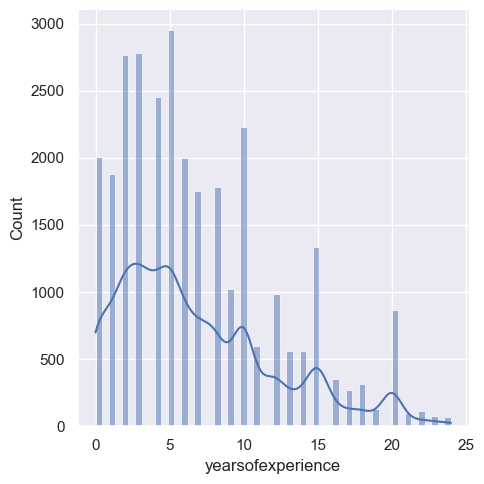

In [42]:
sns.displot(data = df, x = "yearsofexperience", kde = True)

In [43]:
from scipy import stats

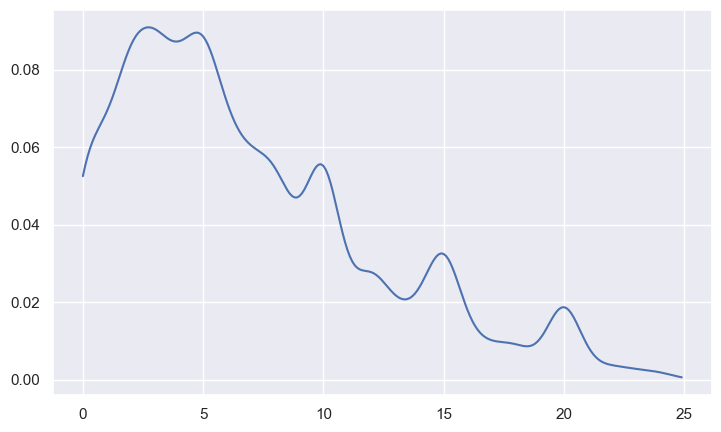

In [44]:
data = df['yearsofexperience']
density = stats.kde.gaussian_kde(data)
x = np.arange(0., 25., .1)
exp_yr = plt.plot(x, density(x))


In [45]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Exp_Level,ln_yearlycompensation,ln_basesalary,gender_1_0
46,9/1/2017 12:09:30,Salesforce,Lead MTS,Software Engineer,320000,"San Francisco, CA",4.0,1.0,Full Stack,210000.0,80000.0,30000.0,Male,PhD,7419,807.0,75,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.676076,12.254868,1.0
717,8/9/2018 12:01:10,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,Male,I have a PhD and I'm joining for a Research Sc...,7300,807.0,1325,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.384219,11.849405,1.0
3427,12/28/2018 6:53:55,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,Male,PhD,40303,511.0,4743,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,11.736069,11.703554,1.0
5037,3/18/2019 10:03:34,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,Male,Entry-level Masters Degree,10182,501.0,6813,1,0,0,0,0,0,0,0,0,0,NaN,Master's Degree,Entry Level,12.043554,11.863589,1.0
5392,3/31/2019 16:58:35,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,Male,PhD,7351,807.0,7271,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,12.712890,12.128117,1.0


In [46]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Exp_Level,ln_yearlycompensation,ln_basesalary,gender_1_0
46,9/1/2017 12:09:30,Salesforce,Lead MTS,Software Engineer,320000,"San Francisco, CA",4.0,1.0,Full Stack,210000.0,80000.0,30000.0,Male,PhD,7419,807.0,75,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.676076,12.254868,1.0
717,8/9/2018 12:01:10,Facebook,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000.0,60000.0,39000.0,Male,I have a PhD and I'm joining for a Research Sc...,7300,807.0,1325,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Intermediate,12.384219,11.849405,1.0
3427,12/28/2018 6:53:55,Capital One,Senior Associate,Data Scientist,125000,"Washington, DC",1.0,0.0,ML / AI,121000.0,0.0,4000.0,Male,PhD,40303,511.0,4743,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,11.736069,11.703554,1.0
5037,3/18/2019 10:03:34,Bloomberg,Software Engineer,Software Engineer,170000,"New York, NY",0.0,0.0,Distributed Systems (Back-End),142000.0,0.0,18000.0,Male,Entry-level Masters Degree,10182,501.0,6813,1,0,0,0,0,0,0,0,0,0,NaN,Master's Degree,Entry Level,12.043554,11.863589,1.0
5392,3/31/2019 16:58:35,Amazon,L5,Data Scientist,332000,"Palo Alto, CA",1.0,0.0,Optimization,185000.0,17000.0,130000.0,Male,PhD,7351,807.0,7271,0,0,1,0,0,0,0,0,0,0,NaN,PhD,Entry Level,12.712890,12.128117,1.0


### Clustering analysis

In [48]:
from sklearn import cluster
import plotly.figure_factory as ff

app=JupyterDash(__name__,external_stylesheets=[dbc.themes.MINTY])

cleandata=pd.read_csv("cleaned_data.csv")
ed_count = cleandata["Education"].value_counts()
ed_count_percent = cleandata["Education"].value_counts(normalize =True)

gen_cleandata = cleandata[cleandata['gender'].isin(['Female','Male'])].groupby(['Education','gender'],as_index=False)[['Education','gender','totalyearlycompensation']].mean()

exp_cleandata =  cleandata[['Education','Exp_Level','totalyearlycompensation']]

colors_list = ['rgba(167, 199, 231, 0.5)', 'rgba(96, 130, 182, 0.5)']

#cluster analysis
#------------- NORMALIZE THE VARIABLES --------------------#
cleandata_cluster = cleandata.loc[:, cleandata.columns.intersection(['yearsofexperience','basesalary','totalyearlycompensation','yearsatcompany','stockgrantvalue','bonus'])]
col_names=cleandata_cluster.columns
z_cols = ['z_'+col for col in col_names]
for col in range(len(z_cols)):
    cleandata_cluster[z_cols[col]]= (cleandata_cluster[col_names[col]]-cleandata_cluster[col_names[col]].mean())/cleandata_cluster[col_names[col]].std()

#------------- CREATE ELBOW PLOT --------------------#
ss=[]
for k in range(2,15):
    model=cluster.KMeans(n_clusters=k , random_state=10)
    model.fit(cleandata_cluster[['z_totalyearlycompensation','z_yearsofexperience','z_yearsatcompany','z_basesalary']])
    ss.append(model.inertia_)
cleandata_elbow=pd.DataFrame({'K':range(2,15),'SS':ss})

#------------- PERFORM CLUSTERING --------------------#
model=cluster.KMeans(n_clusters=4,random_state=9)
model.fit(cleandata_cluster[['z_totalyearlycompensation','z_yearsofexperience']])
cleandata_cluster['cluster']=model.labels_
l=min(cleandata_cluster['totalyearlycompensation'])

#------------- CREATE GRAPHS --------------------#
cleandata_cluster["cluster"] = cleandata_cluster["cluster"].astype(str)
fig_cluster=px.scatter(data_frame=cleandata_cluster,x='yearsofexperience',y='totalyearlycompensation',color='cluster',\
            #color_discrete_sequence=['#5975a5','#cc8964','#5f9e6e','#b65d61']
                    title='Cluster visualization')
fig_countplot =px.histogram(cleandata_cluster,x='cluster',color='cluster',title='Distribution of clusters')
fig_elbow=px.line(cleandata_elbow, x="K", y=ss,title='Elbow plot',labels={'y':'Distortion score'})
fig_elbow.add_vline(x=4,line_dash='dash')


#map data
averages=pd.read_csv('us_average_salaries.csv')
averages = averages[averages['Education'].isin(["Bachelor's Degree", "Master's Degree", 'PhD','Some College'])]

#distribution viz
hist_data = [cleandata['yearsofexperience']]
group_labels = ['Years of experience']
exp_yr = ff.create_distplot(hist_data, group_labels)
exp_yr.update_layout(title='Dist Plot for years of experience(Most people have 2-6 years of experience)')


#barchart visualization
fig_bar=px.bar(x=ed_count.index,y=ed_count,title='Number of Degree Holders by Degree Type')
fig_bar.update_xaxes(title='Degree Type')
fig_bar.update_yaxes(title='Count of Degree Holders')

#boxplot visualization
fig_box=go.Figure()
fig_box=px.box(cleandata, x='Education', y='totalyearlycompensation',title='Distribution of Yearly Compensation by Degree Type')
fig_box.update_layout(hovermode='closest')
fig_box.update_xaxes(title='Degree Type')
fig_box.update_yaxes(title='Total Yearly Compensation')

#multivariate boxplot
fig_box_multi=px.box(cleandata, x='Education', y='totalyearlycompensation', color = "Exp_Level",title='Distribution of Yearly Compensation by Degree Type and Experience Level')

app.layout = html.Div([
    html.H1("Salaries in STEM jobs", style={'color': 'black', 'fontSize': '40px', 'text-align':'center'}),

    dcc.Tabs([


        #TAB1
        dcc.Tab(label='Salary Distribution', 
        children=[

            html.Br(),
            
            #Filter DropDown
            html.Div([dcc.Dropdown(
                id='map_buttons',
                options=[{'label':i,'value':i} for i in averages['Education'].unique()],
                value = "Bachelor's Degree")
                ]),
            
            html.Br(),

            #3 BOXES
            html.Div([
                        #Top left
                html.Div([html.P("Box 1")
                ], style={
                                'height':'50px',
                                'backgroundColor':'lightsteelblue',
                                'color':'darkblue',
                                'margin-left':'10px',
                                'width':'30%',
                                'display':'inline-block'
                    }),
                #Top Middle
                html.Div([html.P("Box 2") ], style={
                                'height':'50px',
                                'backgroundColor':'lightsteelblue',
                                'color':'darkblue',
                                'margin-left':'10px',
                                'width':'30%',
                                'display':'inline-block'
                    }),
                
                #Top Right
                html.Div([html.P("Box 3")
                
            ], style={
                                'height':'50px',
                                'backgroundColor':'lightsteelblue',
                                'color':'darkblue',
                                'margin-left':'10px',
                                'width':'30%',
                                'display':'inline-block'
                    }),
                    ]),

            html.Br(),

            #Title of map
            html.H3('Average Salaries by State'),
            #Map
            html.Div([
            dcc.Graph(
                id='map_graph'),], style ={'height':'400px'}),


            html.Br(),
            html.Br(),

            #BAR AND BOX PLOTS
            html.Div([
                #Box plot for Experience Level
                html.Div([dcc.Graph(
                id='gender plot')], style={'width':'49%',
                        'display':'inline-block'}),

                #Bar plot for Gender
                html.Div([dcc.Graph(
                id='exp plot')], style={'width':'48%',
                        'display':'inline-block'})
                        
                        
                        ])

            ]),


        #TAB 2       
        dcc.Tab(label='Exploratory Data Analysis', children=[
                dcc.Graph(
                        figure=fig_bar
                        ),
                dcc.Graph(
                        figure=fig_box
                        ), 
                dcc.Graph(
                        figure=fig_box_multi
                        ),
                dcc.Graph(
                        figure=exp_yr
                        )
                    ],
               ),
        #TAB 3
        dcc.Tab(label='Clustering', children =[
                html.Br(),
                html.H5('There is an elbow formation at 4 clusters(sum of squares falls steepest here)',style = {'margin-left':'60px'}),
                dcc.Graph(figure=fig_elbow),
                html.H5('Plotting the 4 clusters based on total compensation and years of experience',style = {'margin-left':'60px'}),
                dcc.Graph(figure=fig_cluster),
                html.H5('Most employees are in cluster 0, having entry-intermediate level experience and salary going up to $300k',style = {'margin-left':'60px'}),
                html.Br(),
                html.H5('Employees in cluster 4 have highest salaries($400k+) and usually more than 5 years of experience ',style = {'margin-left':'60px'}),
                dcc.Graph(figure=fig_countplot)

        ],        
        
                )
    ])
])
#Map tab1
@app.callback(Output('map_graph', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    subset = averages[averages['Education'] == level]
    fig = go.Figure(data=go.Choropleth(
        locations=subset['state'], # Spatial coordinates
        z = subset['totalyearlycompensation'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Blues',
        ))
    fig.update_layout(geo_scope='usa')
    return fig

#Gender tab1
@app.callback(Output('gender plot', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    gen_ed = gen_cleandata[gen_cleandata['Education'] == level]
    fig = px.bar(gen_ed, x="gender", y="totalyearlycompensation", color = 'gender',
                  color_discrete_sequence = ["skyblue","steelblue"],barmode="group")
    fig.update_layout(title="Average Total Yearly Compensation by Gender",
    xaxis_title="Gender",
    yaxis_title="Total Yearly Compensation",
    legend_title="Gender")
    #fig.update_traces(marker_color = 'steelblue')   
               
    return fig 

#Exp level tab1
@app.callback(Output('exp plot', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    exp_ed = exp_cleandata[exp_cleandata['Education'] == level]
    fig = px.box(exp_ed, x="Exp_Level", y="totalyearlycompensation", color = 'Exp_Level',
                  color_discrete_sequence = ["lightskyblue","skyblue","steelblue"])
    fig.update_layout(title="Total Yearly Compensation by Experience Level",
    xaxis_title="Experience Level",
    yaxis_title="Total Yearly Compensation",
    legend_title="Experience Level")
    #fig.update_traces(marker_color = 'steelblue')   
               
    return fig  
if __name__ == '__main__':
    app.run_server(mode='external', height= 500, width = '100%',port=8053)

Dash app running on http://127.0.0.1:8053/


In [2]:
# data manipulation
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
# plotly 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
# dashboards
import dash 
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc


app=JupyterDash(__name__,external_stylesheets=[dbc.themes.MINTY])
# app=dash.Dash(__name__,external_stylesheets=[dbc.themes.MINTY])

#Overall Data
cleandata=pd.read_csv("cleaned_data.csv")
ed_count = cleandata["Education"].value_counts()
ed_count_percent = cleandata["Education"].value_counts(normalize =True)

gen_cleandata = cleandata[cleandata['gender'].isin(['Female','Male'])].groupby(['Education','gender'],as_index=False)[['Education','gender','totalyearlycompensation']].mean()

exp_cleandata =  cleandata[['Education','Exp_Level','totalyearlycompensation']]

colors_list = ['rgba(167, 199, 231, 0.5)', 'rgba(96, 130, 182, 0.5)']

#cluster analysis
#------------- NORMALIZE THE VARIABLES --------------------#
cleandata_cluster = cleandata.loc[:, cleandata.columns.intersection(['yearsofexperience','basesalary','totalyearlycompensation','yearsatcompany','stockgrantvalue','bonus'])]
col_names=cleandata_cluster.columns
z_cols = ['z_'+col for col in col_names]
for col in range(len(z_cols)):
    cleandata_cluster[z_cols[col]]= (cleandata_cluster[col_names[col]]-cleandata_cluster[col_names[col]].mean())/cleandata_cluster[col_names[col]].std()

#------------- CREATE ELBOW PLOT --------------------#
ss=[]
for k in range(2,15):
    model=cluster.KMeans(n_clusters=k , random_state=10)
    model.fit(cleandata_cluster[['z_totalyearlycompensation','z_yearsofexperience','z_yearsatcompany','z_basesalary']])
    ss.append(model.inertia_)
cleandata_elbow=pd.DataFrame({'K':range(2,15),'SS':ss})

#------------- PERFORM CLUSTERING --------------------#
model=cluster.KMeans(n_clusters=4,random_state=9)
model.fit(cleandata_cluster[['z_totalyearlycompensation','z_yearsofexperience']])
cleandata_cluster['cluster']=model.labels_
l=min(cleandata_cluster['totalyearlycompensation'])

#------------- CREATE GRAPHS --------------------#
cleandata_cluster["cluster"] = cleandata_cluster["cluster"].astype(str)
fig_cluster=px.scatter(data_frame=cleandata_cluster,x='yearsofexperience',y='totalyearlycompensation',color='cluster',\
            #color_discrete_sequence=['#5975a5','#cc8964','#5f9e6e','#b65d61']
                    title='Cluster visualization')
fig_countplot =px.histogram(cleandata_cluster,x='cluster',color='cluster',title='Distribution of clusters')
fig_elbow=px.line(cleandata_elbow, x="K", y=ss,title='Elbow plot',labels={'y':'Distortion score'})
fig_elbow.add_vline(x=4,line_dash='dash')


#map data
averages=pd.read_csv('us_average_salaries.csv')
averages = averages[averages['Education'].isin(["Bachelor's Degree", "Master's Degree", 'PhD','Some College'])]

#distribution viz
hist_data = [cleandata['yearsofexperience']]
group_labels = ['Years of experience']
exp_yr = ff.create_distplot(hist_data, group_labels)
exp_yr.update_layout(title='Dist Plot for years of experience(Most people have 2-6 years of experience)')


#barchart visualization
fig_bar=px.bar(x=ed_count.index,y=ed_count,title='Number of Degree Holders by Degree Type')
fig_bar.update_xaxes(title='Degree Type')
fig_bar.update_yaxes(title='Count of Degree Holders')

#boxplot visualization
fig_box=go.Figure()
fig_box=px.box(cleandata, x='Education', y='totalyearlycompensation',title='Distribution of Yearly Compensation by Degree Type')
fig_box.update_layout(hovermode='closest')
fig_box.update_xaxes(title='Degree Type')
fig_box.update_yaxes(title='Total Yearly Compensation')

#multivariate boxplot
fig_box_multi=px.box(cleandata, x='Education', y='totalyearlycompensation', color = "Exp_Level",title='Distribution of Yearly Compensation by Degree Type and Experience Level')

app.layout = html.Div([
    html.Br(),
    html.H1("Does a Master's degree lead to higher salaries in the USA?", style={'color': 'black', 'fontSize': '40px', 'text-align':'center'}),
    html.Br(),
    dcc.Tabs([
        
        #TAB1       
        dcc.Tab(label='Exploratory Data Analysis', children=[
                dcc.Graph(
                        figure=fig_bar
                        ),
                dcc.Graph(
                        figure=fig_box
                        ), 
                dcc.Graph(
                        figure=fig_box_multi
                        ),
                dcc.Graph(
                        figure=exp_yr
                        )
                    ],
               ),
        
        #TAB2
        dcc.Tab(label='Salary Distribution', 
        children=[

            html.Br(),
            
            #Filter DropDown
            html.Div([dcc.Dropdown(
                id='map_buttons',
                options=[{'label':i,'value':i} for i in averages['Education'].unique()],
                value = "Bachelor's Degree")
                ]),
            
            html.Br(),

            #3 BOXES
            html.Div([
                dbc.Row([
    dbc.Col(
        dbc.Card(
            [

                dbc.CardBody(
                    [
                        html.H5(id='card_title_1', children=['Average Total Yearly Compensation'], className='card-title',
                                ),
                        html.P(id='card_text_1', children=['Sample text.'],style={'fontSize': '25px', 'color':'darkblue'}),
                    ]
                )
            ]
        ),
        #md=4
    ),
    dbc.Col(
        dbc.Card(
            [

                dbc.CardBody(
                    [
                        html.H5('Maximum Total Yearly Compensation', className='card-title',),
                        html.P(id='card_text_2',children=['Sample text.'],style={'fontSize': '25px', 'color':'darkblue'}),
                    ]
                ),
            ]

        ),
        #md=4
    ),
    dbc.Col(
        dbc.Card(
            [
                dbc.CardBody(
                    [
                        html.H5('Most Popular Job Title', className='card-title',),
                        html.P(id='card_text_3',children=['Sample text.'],style={'fontSize': '25px', 'color':'darkblue'}),
                    ]
                ),
            ]

        ),
        #md=4
    ),
    
])
                
                    ]),

            html.Br(),

            #Title of map
            html.H3('Average Salaries by State'),
            #Map
            html.Div([
            dcc.Graph(
                id='map_graph'),], style ={'height':'400px'}),


            html.Br(),
            html.Br(),

            #BAR AND BOX PLOTS
            html.Div([
                #Box plot for Experience Level
                html.Div([dcc.Graph(
                id='gender plot')], style={'width':'49%',
                        'display':'inline-block'}),

                #Bar plot for Gender
                html.Div([dcc.Graph(
                id='exp plot')], style={'width':'48%',
                        'display':'inline-block'})
                        
                        
                        ])

            ]),

        #TAB 3
        dcc.Tab(label='Clustering', children =[
                html.Br(),
                html.H5('There is an elbow formation at 4 clusters(sum of squares falls steepest here)',style = {'margin-left':'60px'}),
                dcc.Graph(figure=fig_elbow),
                html.H5('Plotting the 4 clusters based on total compensation and years of experience',style = {'margin-left':'60px'}),
                dcc.Graph(figure=fig_cluster),
                html.H5('Most employees are in cluster 0, having entry-intermediate level experience and salary going up to $300k',style = {'margin-left':'60px'}),
                html.Br(),
                html.H5('Employees in cluster 4 have highest salaries($400k+) and usually more than 5 years of experience ',style = {'margin-left':'60px'}),
                dcc.Graph(figure=fig_countplot)

        ],        
        
                )
    ])
])
#Map tab1
@app.callback(Output('map_graph', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    subset = averages[averages['Education'] == level]
    fig = go.Figure(data=go.Choropleth(
        locations=subset['state'], # Spatial coordinates
        z = subset['totalyearlycompensation'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Blues',
        ))
    fig.update_layout(geo_scope='usa')
    return fig

#Gender tab1
@app.callback(Output('gender plot', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    gen_ed = gen_cleandata[gen_cleandata['Education'] == level]
    fig = px.bar(gen_ed, x="gender", y="totalyearlycompensation", color = 'gender',
                  color_discrete_sequence = ["skyblue","steelblue"],barmode="group")
    fig.update_layout(title="Average Total Yearly Compensation by Gender",
    xaxis_title="Gender",
    yaxis_title="Total Yearly Compensation",
    legend_title="Gender")
    #fig.update_traces(marker_color = 'steelblue')   
               
    return fig 

#Exp level tab1
@app.callback(Output('exp plot', 'figure'),
              Input('map_buttons', 'value'))
def update_graph(level):
    exp_ed = exp_cleandata[exp_cleandata['Education'] == level]
    fig = px.box(exp_ed, x="Exp_Level", y="totalyearlycompensation", color = 'Exp_Level',
                  color_discrete_sequence = ["lightskyblue","skyblue","steelblue"])
    fig.update_layout(title="Total Yearly Compensation by Experience Level",
    xaxis_title="Experience Level",
    yaxis_title="Total Yearly Compensation",
    legend_title="Experience Level")
    #fig.update_traces(marker_color = 'steelblue')   
               
    return fig

#Card1
@app.callback(Output('card_text_1', 'children'),
              Input('map_buttons', 'value'))
def update_card_text_1(level):
    exp_ed = exp_cleandata[exp_cleandata['Education'] == level]
    mean_ed_sal = round(exp_ed['totalyearlycompensation'].mean())
    #txt_content = print(f'${mean_ed_sal}')

    return mean_ed_sal

#Card2
@app.callback(Output('card_text_2', 'children'),
              Input('map_buttons', 'value'))
def update_card_text_2(level):
    exp_ed = exp_cleandata[exp_cleandata['Education'] == level]
    max_ed_sal = round(exp_ed['totalyearlycompensation'].max())
    #txt_content = print(f'${mean_ed_sal}')

    return max_ed_sal

#Card3
@app.callback(Output('card_text_3', 'children'),
              Input('map_buttons', 'value'))
def update_card_text_2(level):
    exp_ed = cleandata[cleandata['Education'] == level]
    #min_ed_sal = round(exp_ed['totalyearlycompensation'].min())
    titles = exp_ed['title'].value_counts()
    job_title = titles.idxmax()
    #txt_content = print(f'${mean_ed_sal}')
    #us_avg = averages[averages['Education']==level]
    #mean_us = us_avg['totalyearlycompensation'].mean()

    return job_title

if __name__ == '__main__':
    app.run_server(mode='external', height= 500, width = '100%',port=8053)

# if __name__ == '__main__':
#     app.run_server(debug=True)

Dash app running on http://127.0.0.1:8053/
